# Demostration of noise in the control 

## Hadamard gate

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal as gauss
pi = np.pi

Hadamard gate can be generated by Hamiltonian $\sigma_y$ and a $\sigma_z$ for time $t_1$ and $t_2$

$u = \exp[-i\sigma_z t_2]\cdot\exp[-i\sigma_y t_1]$

In [2]:
H1 = sigmay()
H2 = sigmaz()
t1 = 3./4.*pi
t2 = 1./2.*pi
up = basis(2,0)

This can be proved by explicit calculation

In [3]:
u1 = (-1.j * t1 * H1).expm()
u2 = (-1.j * t2 * H2).expm()
u = u2*u1
u

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.+0.70710678j 0.+0.70710678j]
 [0.+0.70710678j 0.-0.70710678j]]

Now we use mesolve to calculate the state evolution under these two pulses and vary $t_1$ for Hamiltonian $\sigma_z$. We start from $|{\uparrow}>$ and should get $|+>$ if $t=t_1$

In [4]:
def noisy_Hadamard(t1):
    iter_num = 50

    rho0 = basis(2,0)
    tlist = np.linspace(0,t1,iter_num)
    H = [[H1, np.ones(iter_num)]]
    result = mesolve(H, rho0, tlist)

    rho1 = result.states[-1]
    tlist = np.linspace(0,t2-0.03,iter_num)
    H = [[H2, np.ones(iter_num)]]
    result = mesolve(H, rho1, tlist)
    
    return result.states[-1]

In [5]:
t1_line = np.linspace(0.8*t1,1.2*t1,30)
plus = (basis(2,0)+basis(2,1)).unit()
F_line = list(map(lambda t1: fidelity(noisy_Hadamard(t1), plus), t1_line))

We plot the fidelity as a function of $t/t_1$

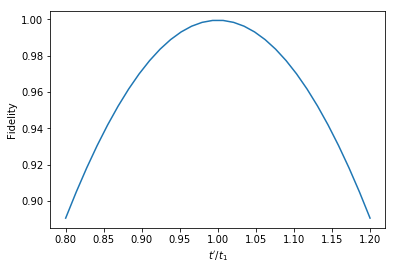

In [6]:
plt.plot(t1_line/t1, F_line)
plt.xlabel("$t'/t_1$")
plt.ylabel("Fidelity");

## CNOT gate
We do the same for CNOT gate. We assume here that all the single qubit operations are perfect and only the two qubit interaction is noisy.

In [7]:
t = pi/8
# two qubits interaction
H = (tensor(sigmax(),identity(2)) + tensor(identity(2),sigmax()))**2
u = (-1.j*t*H).expm()
snot12 = tensor(snot(),snot())
snot1 = tensor(snot(),identity(2))
snot2 = tensor(identity(2),snot())
snot1* u * snot12 * tensor(rz(-pi/2),rz(-pi/2)) * snot2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [8]:
def noisy_CNOT(t):
    iter_num = 50
    rho = tensor(basis(2,1),basis(2,0))
    rho = snot12 * tensor(rz(-pi/2),rz(-pi/2)) * snot2 * rho
    tlist = np.linspace(0,t,iter_num)
    result = mesolve([[H, np.ones(iter_num)]], rho, tlist)
    return snot1* result.states[-1]

We start from the $|10>$ state and should get $|11>$ state if the operation is perfect

In [9]:
t_line = np.linspace(0.8*t,1.2*t,30)
correct_end_state = tensor(basis(2,1),basis(2,1))
F_line = list(map(lambda t: fidelity(noisy_CNOT(t), correct_end_state), t_line))

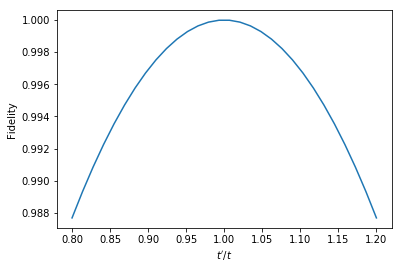

In [10]:
plt.plot(t_line/t, F_line)
plt.xlabel("$t'/t$")
plt.ylabel("Fidelity");